In [81]:
import pandas as pd

In [82]:
#Importación de datos
Dataset = pd.read_csv("C:/Users/lfvvi/OneDrive/Documentos/ESCRITORIO/DS - SELF LEARNING/MACHINE LEARNING/1. SUPERVISED/3. Decision Trees (DT)/Python/DataSet.csv")

#Análisis descriptivo de los datos
Dataset.describe(include="all")

,outlook,temp.,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,6,6,7,8,9


In [83]:
Dataset.head(n=14)

,outlook,temp.,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainny,mild,high,False,yes
4,rainny,cool,normal,False,yes
5,rainny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,sunny,mild,normal,False,yes


In [84]:
Dataset_Dummies = pd.get_dummies(Dataset, columns=["outlook", "temp.", "humidity", "windy", "play"])
Dataset_Dummies

Dataset_Dummies_Modified = Dataset_Dummies.drop(["play_no", "windy_False", "humidity_normal" ],axis=1)
Dataset_Dummies_Modified

,outlook_overcast,outlook_rainny,outlook_sunny,temp._cool,temp._hot,temp._mild,humidity_high,windy_True,play_yes
0,0,0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,1,1,0
2,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1
4,0,1,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0
6,1,0,0,1,0,0,0,1,1
7,0,0,1,0,0,1,1,0,0
8,0,0,1,1,0,0,0,0,1
9,0,0,1,0,0,1,0,0,1


In [85]:
Dataset_Dummies_Modified.columns = ['Overcast', 'Rain', 'Sunny', 'Cool',
       'Hot', 'Mild', 'Humidity', 'Windy', 'Play']
Dataset_Dummies_Modified

,Overcast,Rain,Sunny,Cool,Hot,Mild,Humidity,Windy,Play
0,0,0,1,0,1,0,1,0,0
1,0,0,1,0,1,0,1,1,0
2,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,1,1,0,1
4,0,1,0,1,0,0,0,0,1
5,0,1,0,1,0,0,0,1,0
6,1,0,0,1,0,0,0,1,1
7,0,0,1,0,0,1,1,0,0
8,0,0,1,1,0,0,0,0,1
9,0,0,1,0,0,1,0,0,1


In [86]:
Tag_Names = Dataset_Dummies_Modified.columns

In [87]:
from sklearn.model_selection import train_test_split
Y = Dataset_Dummies_Modified['Play']
X = Dataset_Dummies_Modified.drop('Play',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

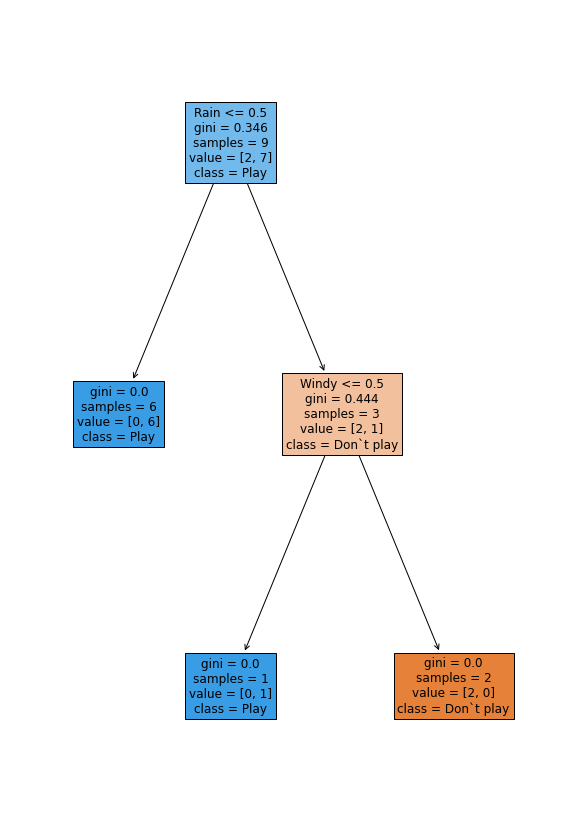

In [90]:
import matplotlib.pyplot as plt
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier

CLF = DecisionTreeClassifier(ccp_alpha=0.01)
CLF= CLF.fit(X_train,Y_train)

fig = plt.figure(figsize=(10,15))
result = tree.plot_tree(CLF,
                   feature_names=Tag_Names,
                   class_names={0:'Don`t play', 1:'Play'},
                   filled=True,
                  fontsize=12)

In [91]:
predictions = CLF.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=['Don`t play','Play']))

              precision    recall  f1-score   support

  Don`t play       0.00      0.00      0.00         3
        Play       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\lfvvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

https://github.com/misraturp/Decision-Tree-Implementation/blob/main/Decision%20Trees%20with%20Scikitlearn.ipynb